# Agregando regiões geográficas

In [1]:
import geopandas as gpd

# Carregando a base de dados

In [3]:
setor = gpd.read_file('../01.Dados/Mapas/RJ-SETOR/RJ-SETOR.shp')

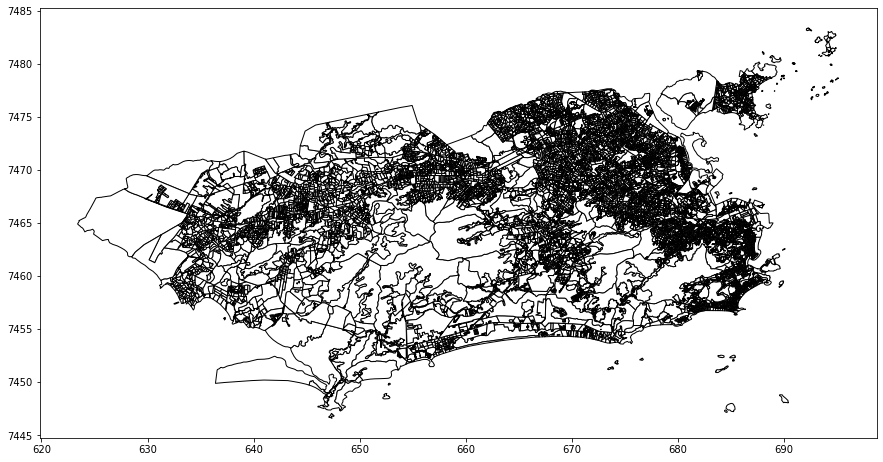

In [4]:
setor.plot(color='white',edgecolor='black',figsize=(15,8))

SETORES CENSITÁRIOS DO MUNICÍPIOS DE RIO DE JANAIRO

# Modificando o CRS da base de dados

In [8]:
setor = setor.to_crs({'init':'epsg:4326'})
setor_n = setor[['NM_BAIRRO','geometry']]

/home/sh/.local/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [9]:
bairro = setor_n.dissolve(by='NM_BAIRRO')

In [10]:
bairro

,geometry
NM_BAIRRO,
Abolição,"POLYGON ((-43.29489 -22.88916, -43.29457 -22.8..."
Acari,"POLYGON ((-43.33882 -22.82658, -43.33949 -22.8..."
Alto da Boa Vista,"POLYGON ((-43.29377 -22.97986, -43.29380 -22.9..."
Anchieta,"POLYGON ((-43.41112 -22.83336, -43.41115 -22.8..."
Andaraí,"POLYGON ((-43.25436 -22.93422, -43.25436 -22.9..."
...,...
Vila Valqueire,"POLYGON ((-43.36722 -22.89664, -43.36718 -22.8..."
Vila da Penha,"POLYGON ((-43.30720 -22.84905, -43.30738 -22.8..."
Vista Alegre,"POLYGON ((-43.30903 -22.83303, -43.30909 -22.8..."


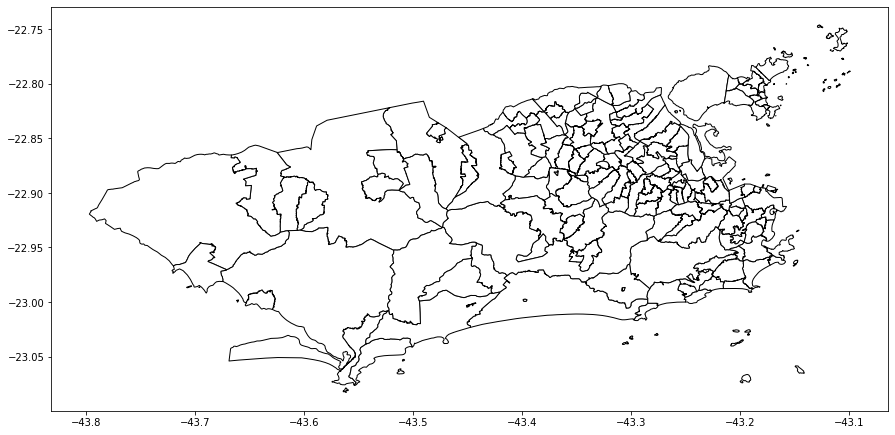

In [11]:
bairro.plot(color='white',edgecolor='black',figsize=(15,8))

BAIRROS DO MUNICÍPIO DE RIO DE JANEIRO

In [12]:
setor_n = setor[['NM_BAIRRO','geometry','V002']]

In [2]:
# dissolve os dados com base em uma função, no caso a função soma sum()
bairro = setor_n.dissolve(by='NM_BAIRRO',aggfunc='sum')

NameError: name 'setor_n' is not defined

In [14]:
bairro

,geometry,V002
NM_BAIRRO,,
Abolição,"POLYGON ((-43.29489 -22.88916, -43.29457 -22.8...",11356.0
Acari,"POLYGON ((-43.33882 -22.82658, -43.33949 -22.8...",26967.0
Alto da Boa Vista,"POLYGON ((-43.29377 -22.97986, -43.29380 -22.9...",9189.0
Anchieta,"POLYGON ((-43.41112 -22.83336, -43.41115 -22.8...",55634.0
Andaraí,"POLYGON ((-43.25436 -22.93422, -43.25436 -22.9...",39325.0
...,...,...
Vila Valqueire,"POLYGON ((-43.36722 -22.89664, -43.36718 -22.8...",32232.0
Vila da Penha,"POLYGON ((-43.30720 -22.84905, -43.30738 -22.8...",25462.0
Vista Alegre,"POLYGON ((-43.30903 -22.83303, -43.30909 -22.8...",8622.0


In [15]:
setor_n['V002'].sum()

6283486.0

In [16]:
bairro['V002'].sum()

6283486.0

In [17]:
bairro = bairro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [19]:
bairro

,geometry,V002
NM_BAIRRO,,
Abolição,"POLYGON ((674.902 7467.737, 674.936 7467.767, ...",11356.0
Acari,"POLYGON ((670.474 7474.718, 670.405 7474.689, ...",26967.0
Alto da Boa Vista,"POLYGON ((674.901 7457.693, 674.898 7457.693, ...",9189.0
Anchieta,"POLYGON ((663.045 7474.050, 663.041 7474.046, ...",55634.0
Andaraí,"POLYGON ((679.002 7462.700, 679.002 7462.700, ...",39325.0
...,...,...
Vila Valqueire,"POLYGON ((667.473 7466.993, 667.477 7466.985, ...",32232.0
Vila da Penha,"POLYGON ((673.691 7472.193, 673.672 7472.177, ...",25462.0
Vista Alegre,"POLYGON ((673.524 7473.970, 673.517 7473.968, ...",8622.0


In [20]:
bairro.reset_index(inplace=True)

In [21]:
bairro

,NM_BAIRRO,geometry,V002
0,Abolição,"POLYGON ((674.902 7467.737, 674.936 7467.767, ...",11356.0
1,Acari,"POLYGON ((670.474 7474.718, 670.405 7474.689, ...",26967.0
2,Alto da Boa Vista,"POLYGON ((674.901 7457.693, 674.898 7457.693, ...",9189.0
3,Anchieta,"POLYGON ((663.045 7474.050, 663.041 7474.046, ...",55634.0
4,Andaraí,"POLYGON ((679.002 7462.700, 679.002 7462.700, ...",39325.0
...,...,...,...
155,Vila Valqueire,"POLYGON ((667.473 7466.993, 667.477 7466.985, ...",32232.0
156,Vila da Penha,"POLYGON ((673.691 7472.193, 673.672 7472.177, ...",25462.0
157,Vista Alegre,"POLYGON ((673.524 7473.970, 673.517 7473.968, ...",8622.0
158,Zumbi,"POLYGON ((687.240 7474.829, 687.239 7474.833, ...",2016.0


# Salvando as mudanças em um arquivo

In [22]:
import os

dir = '../01.Dados/Mapas/RJ-BAIRRO'
if not os.path.exists(dir):
    os.makedirs(dir)
    
bairro.to_file(dir + '/RJ-BAIRRO.shp')